# AutoInland Vehicle Insurance Claim Challenge

When providing insurance, there are very few points of contact between customers and the insurance provider. Because of this, AutoInland (an Insurance company in west Africa with a focus on Auto Insurance) needs to make every point of contact count; one of the most valuable of these is filing and settlement of claims.

AutoInland believes that to achieve better service level standards, they need to anticipate future demands in terms of claims request volume. This will allow them to better manage their resources while keeping the customer experience positive and the levels of satisfaction high.

The objective of this hackathon is to develop a predictive model that determines if a customer will submit a vehicle insurance claim in the next three months. This solution will help streamline financial planning at AutoInland and allow them to better serve their customers by understanding which customers are likely to submit a claim.

In [1]:
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings('ignore')
import datetime as dt                           #convert date formats
from IPython.display import display 
#
import matplotlib.pyplot as plt
%matplotlib inline
#
import seaborn as sns
sns.set()
import gc     

In [2]:
#Setting styles and aesthetics
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#copies
trn = train.copy()
tst = test.copy()

In [4]:
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))

Train data shape: 12079 Rows, 14 Columns
Test data shape: 5177 Rows, 13 Columns


In [5]:
# Print First Few Rows Of The Data
display("Train data")
display(train.head(3))
display(train.tail(3))
display("test data")
display(test.head(3))
display(train.tail(3))

'Train data'

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0
12078,ID_ZZWRIIE,2010-07-01,2011-06-30,Female,46,2010-07-01,2,JEEP,Black,Land Rover,Lagos Island,Lagos,Car Classic,0


'test data'

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,ID_01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0
12078,ID_ZZWRIIE,2010-07-01,2011-06-30,Female,46,2010-07-01,2,JEEP,Black,Land Rover,Lagos Island,Lagos,Car Classic,0


In [6]:
train['set'] = 'train'
test['set'] = 'test'
#
#merge the two sets of data for data analysis and visualization
data = pd.concat([train,test])
display(data.head(3))
display(data.tail(3))

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,set
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.00,train
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.00,train
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.00,train


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,set
5174,ID_ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,nan,test
5175,ID_ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,nan,test
5176,ID_ZZYTLV1,2010-07-17,2011-07-16,Male,68,2010-07-17,1,Saloon,NaN,Peugeot,NaN,NaN,CarSafe,nan,test


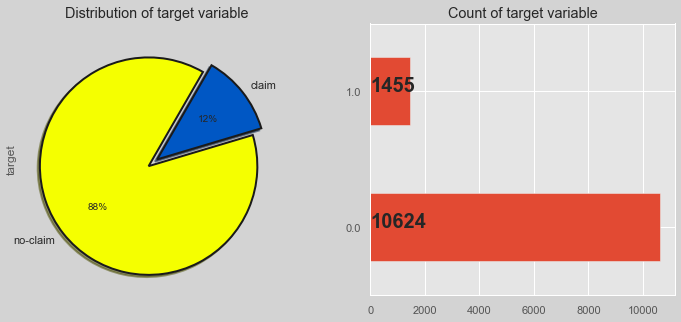

In [7]:
# Distribution of the target variable
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
data[data['set'] == "train"]["target"].value_counts().plot.pie(autopct = "%1.0f%%",  colors = sns.color_palette("prism",7),
                                                                                    startangle = 60,
                                                                                    labels=["no-claim","claim"],
                                                                                    wedgeprops={"linewidth":2,"edgecolor":"k"},
                                                                                    explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = data[data['set'] == "train"]["target"].value_counts().plot(kind="barh")

for i,j in enumerate(data[data['set'] == "train"]["target"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

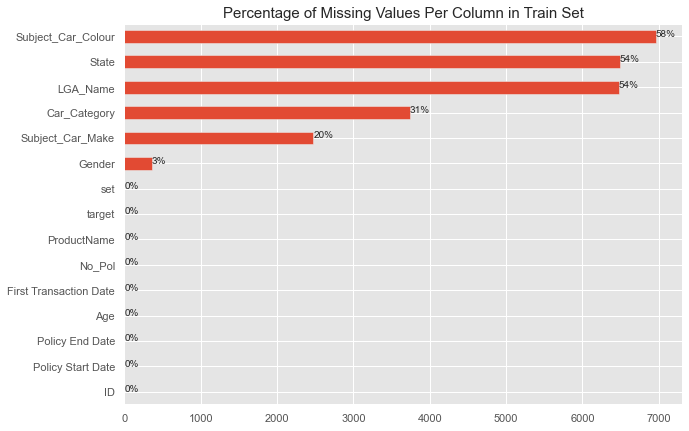

In [8]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

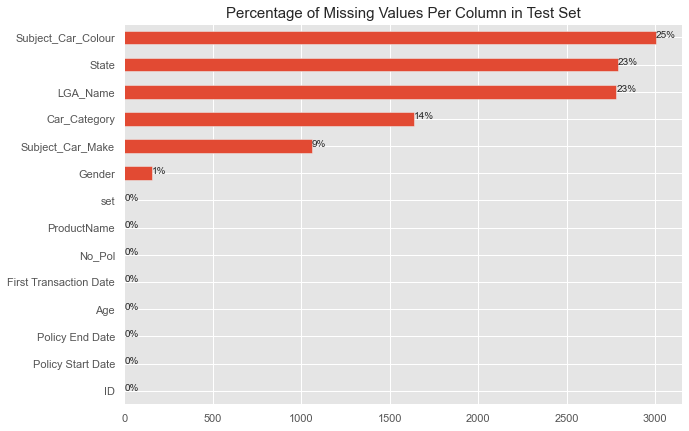

In [9]:
# Check if there any missing values in train set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [10]:
# Change each column to its appriopriate datatype
date_cols = [col for col in data.columns if 'Date' in col]
num_cols = ['Age', 'No_Pol']
cat_cols = [col for col in data.columns if col not in date_cols+num_cols+['ID', 'target']]

for col in data.columns:
    if col in date_cols:
        data[col] = pd.to_datetime(data[col])
    elif col in cat_cols:
            data[col] = data[col].astype('category')

# Confirm whether the changes have been applied successfully
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17256 entries, 0 to 5176
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  16741 non-null  category      
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  datetime64[ns]
 6   No_Pol                  17256 non-null  int64         
 7   Car_Category            11880 non-null  category      
 8   Subject_Car_Colour      7289 non-null   category      
 9   Subject_Car_Make        13719 non-null  category      
 10  LGA_Name                7998 non-null   category      
 11  State                   7980 non-null   category      
 12  ProductName             17256 non-null  categor

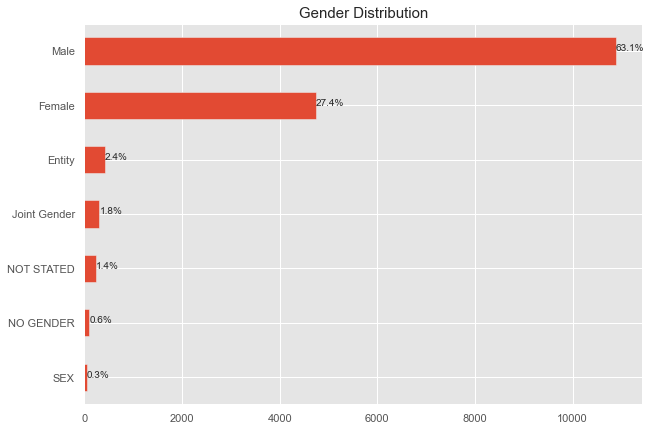

In [11]:
# Gender distribution 
ax = data.Gender.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Gender Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

In [12]:
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
data.Gender = data.Gender.replace(mapper).astype('category')

# Confirm mappings
data.Gender.value_counts()

Male      10888
Female     4735
Other      1118
Name: Gender, dtype: int64

In [13]:
# Check unique values for each categorical column
for col in cat_cols:
    display(col)
    print(data[col].unique(), '\n')

'Gender'

['Male', 'Female', 'Other', NaN]
Categories (3, object): ['Male', 'Female', 'Other'] 



'Car_Category'

['Saloon', 'JEEP', NaN, 'Motorcycle', 'Truck', ..., 'Wagon', 'Shape Of Vehicle Chasis', 'Sedan', 'Station 4 Wheel', 'Tipper Truck']
Length: 17
Categories (16, object): ['Saloon', 'JEEP', 'Motorcycle', 'Truck', ..., 'Shape Of Vehicle Chasis', 'Sedan', 'Station 4 Wheel', 'Tipper Truck'] 



'Subject_Car_Colour'

['Black', 'Grey', 'Red', NaN, 'As Attached', ..., 'Yellow & White', 'Beige Mitalic', 'Light Gray', 'Blue Sky', 'Red Maroon']
Length: 47
Categories (46, object): ['Black', 'Grey', 'Red', 'As Attached', ..., 'Beige Mitalic', 'Light Gray', 'Blue Sky', 'Red Maroon'] 



'Subject_Car_Make'

['TOYOTA', NaN, 'REXTON', 'Lexus', 'Hyundai', ..., 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj', 'Datsun']
Length: 76
Categories (75, object): ['TOYOTA', 'REXTON', 'Lexus', 'Hyundai', ..., 'Buik', 'COMMANDER', 'Bajaj', 'Datsun'] 



'LGA_Name'

[NaN, 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', ..., 'Hong', 'Ifako-Agege', 'Benue', 'Okpokwu', 'Ngor-Okpala']
Length: 271
Categories (270, object): ['Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', ..., 'Ifako-Agege', 'Benue', 'Okpokwu', 'Ngor-Okpala'] 



'State'

[NaN, 'Lagos', 'Benue', 'Eti-Osa', 'Delta', ..., 'ENUGU-SOUTH', 'Ijebu-North', 'Asari-Toru', 'Idemili-south', 'Ngor-Okpala']
Length: 114
Categories (113, object): ['Lagos', 'Benue', 'Eti-Osa', 'Delta', ..., 'Ijebu-North', 'Asari-Toru', 'Idemili-south', 'Ngor-Okpala'] 



'ProductName'

['Car Classic', 'CarSafe', 'Muuve', 'CVTP', 'Car Plus', 'Motor Cycle', 'Customized Motor', 'CarFlex', 'Car Vintage']
Categories (9, object): ['Car Classic', 'CarSafe', 'Muuve', 'CVTP', ..., 'Motor Cycle', 'Customized Motor', 'CarFlex', 'Car Vintage'] 



'set'

['train', 'test']
Categories (2, object): ['train', 'test'] 



In [14]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'set'],
      dtype='object')

In [15]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with mean
for col in data.columns:
    if col in date_cols + cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])
    elif col in num_cols:
        data[col] = data[col].fillna(data[col].mean())

# Confirm that there aren't any missing values
data[data.columns.difference(['target'])].isna().sum()

Age                       0
Car_Category              0
First Transaction Date    0
Gender                    0
ID                        0
LGA_Name                  0
No_Pol                    0
Policy End Date           0
Policy Start Date         0
ProductName               0
State                     0
Subject_Car_Colour        0
Subject_Car_Make          0
set                       0
dtype: int64

## Feature Engineering

In [16]:
data.drop_duplicates(subset=data.columns, keep='last', inplace=True)

In [17]:
def week_num(x):
    if x >= 1 and x <= 7:
        return 'week_1'
    elif x >= 8 and x <= 14:
        return 'week_2'
    elif x >= 15 and x <= 21:
        return 'week_3'
    else:
        return 'week_4'

In [18]:
# Extract date features from the date columns
for col in date_cols:
    for date_feature in ['year', 'month', 'day']:
        data[col + date_feature] = getattr(data[col].dt, date_feature)
#
data['Policy_period_year'] = data['Policy End Dateyear'] - data['Policy Start Dateyear']
data['Policy_period_month'] = abs(data['Policy End Datemonth'] - data['Policy Start Datemonth'])
data['Policy_period_day'] = abs(data['Policy End Dateday'] - data['Policy Start Dateday'])

#quarters
data['Policy Start Datemonth quarter'] = pd.cut(data['Policy Start Datemonth'], 
                                                [0,3,6,9,12], 
                                                labels = ['Q1','Q2', 'Q3', 'Q4'])

data['Policy End Datemonth quarter'] = pd.cut(data['Policy End Datemonth'], 
                                              [0,3,6,9,12], 
                                              labels = ['Q1','Q2', 'Q3', 'Q4'])

data['First Transaction Datemonth quarter'] = pd.cut(data['First Transaction Datemonth'], 
                                                     [0,3,6,9,12], 
                                                     labels = ['Q1','Q2', 'Q3', 'Q4'])

#week number
data['Policy Start Week Number'] = data['Policy Start Dateday'].apply(week_num)
data['Policy End Week Number'] = data['Policy End Dateday'].apply(week_num)
data['First Transaction Week Number'] = data['First Transaction Dateday'].apply(week_num)

columns = ['No_Pol', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'Policy Start Dateyear', 
           'Policy Start Datemonth', 'Policy Start Dateday', 'Policy End Dateyear', 'Policy End Datemonth',
           'Policy End Dateday', 'First Transaction Dateyear', 'First Transaction Datemonth', 'First Transaction Dateday', 
          'Policy Start Datemonth quarter', 'Policy_period_month', 'Policy_period_day', 
          'Policy Start Datemonth quarter', 'Policy End Datemonth quarter', 'First Transaction Datemonth quarter', 
          'Policy Start Week Number', 'Policy End Week Number', 'First Transaction Week Number']
#
# encode frequencies of the categories
for col in columns:
    freq = data[col].value_counts().to_dict()
    data[col + '_freq_encode'] = data[col].map(freq)
#one hot encode categorical variables
for col in columns:
    data[col] = data[col].astype('category').cat.codes

# Encode categorical features
dummify = ['Gender', 'ProductName', 'Policy Start Datemonth quarter', 'Policy End Datemonth quarter', 
           'First Transaction Datemonth quarter', 'Policy Start Week Number', 'Policy End Week Number', 
           'First Transaction Week Number']
#
data = pd.get_dummies(data = data, columns = dummify)
#
data.drop(['Policy Start Date', 'Policy End Date', 'First Transaction Date'], axis=1, inplace=True)

In [19]:
#define a function for treating outliers
def treat_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)
#
treat_outlier(data, 'Age')

First quantile:  34.0
Third quantile:  50.0
IQR:  16.0
Lower bound:  10.0 Upper bound:  74.0


In [20]:
data = data[(data['Age'] > 10) & (data['Age'] < 74)]

In [21]:
def age_bracket(x):
    if x <= 17:
        return 'underage'
    elif x >= 18 and x <= 28:
        return '18-28'
    elif x >= 29 and x <= 39:
        return '29-39'
    elif x >= 40 and x <= 50:
        return '40-50'
    elif x >= 51 and x <= 61:
        return '51-61'
    elif x >= 62 and x <= 72:
        return '62-72'
    else: 
        return 'retiree'
#
# loop through the column to pass the function and one hot encode the values
data['Age'] = data['Age'].apply(age_bracket).astype('category').cat.codes

In [22]:
#renaming columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_')
#
train = data[data['set'] == 'train']
test = data[data['set'] == 'test']
#
train.drop(['set', 'id'], inplace=True, axis=1)
train.reset_index(drop = True, inplace=True)
#
test.drop(['id', 'target', 'set'], inplace=True, axis=1)
test.reset_index(drop = True, inplace=True)

In [23]:
# Print First Few Rows Of The Data
display("Train data")
print('Dimensions: ', train.shape)
display(train.head(3))
display(train.tail(3))
display("test data")
print('Dimensions: ', test.shape)
display(test.head(3))
display(test.tail(3))

'Train data'

Dimensions:  (11011, 79)


,age,no_pol,car_category,subject_car_colour,subject_car_make,lga_name,state,target,policy_start_dateyear,policy_start_datemonth,policy_start_dateday,policy_end_dateyear,policy_end_datemonth,policy_end_dateday,first_transaction_dateyear,first_transaction_datemonth,first_transaction_dateday,policy_period_year,policy_period_month,policy_period_day,no_pol_freq_encode,car_category_freq_encode,subject_car_colour_freq_encode,subject_car_make_freq_encode,lga_name_freq_encode,state_freq_encode,policy_start_dateyear_freq_encode,policy_start_datemonth_freq_encode,policy_start_dateday_freq_encode,policy_end_dateyear_freq_encode,policy_end_datemonth_freq_encode,policy_end_dateday_freq_encode,first_transaction_dateyear_freq_encode,first_transaction_datemonth_freq_encode,first_transaction_dateday_freq_encode,policy_start_datemonth_quarter_freq_encode,policy_period_month_freq_encode,policy_period_day_freq_encode,policy_end_datemonth_quarter_freq_encode,first_transaction_datemonth_quarter_freq_encode,policy_start_week_number_freq_encode,policy_end_week_number_freq_encode,first_transaction_week_number_freq_encode,gender_female,gender_male,gender_other,productname_cvtp,productname_car_classic,productname_car_plus,productname_car_vintage,productname_carflex,productname_carsafe,productname_customized_motor,productname_motor_cycle,productname_muuve,policy_start_datemonth_quarter_0,policy_start_datemonth_quarter_1,policy_start_datemonth_quarter_2,policy_start_datemonth_quarter_3,policy_end_datemonth_quarter_0,policy_end_datemonth_quarter_1,policy_end_datemonth_quarter_2,policy_end_datemonth_quarter_3,first_transaction_datemonth_quarter_0,first_transaction_datemonth_quarter_1,first_transaction_datemonth_quarter_2,first_transaction_datemonth_quarter_3,policy_start_week_number_0,policy_start_week_number_1,policy_start_week_number_2,policy_start_week_number_3,policy_end_week_number_0,policy_end_week_number_1,policy_end_week_number_2,policy_end_week_number_3,first_transaction_week_number_0,first_transaction_week_number_1,first_transaction_week_number_2,first_transaction_week_number_3
0,1,0,8,4,68,258,74,0.00,7,4,13,1,4,12,7,4,13,1,0,1,13685,13988,12635,10636,10927,13826,17241,1341,489,16997,1446,521,17241,1341,489,4083,14562,13651,4458,4083,3651,3627,3651,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,2,0,8,32,68,258,74,0.00,7,2,20,1,2,19,7,2,20,1,0,1,13685,13988,361,10636,10927,13826,17241,1533,541,16997,1815,534,17241,1533,541,4625,14562,13651,5533,4625,3977,3875,3977,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,2,8,4,68,165,74,1.00,7,7,28,0,11,30,7,7,28,0,4,2,795,13988,12635,10636,244,13826,17241,1380,564,250,1311,525,17241,1380,564,4309,198,1026,3511,4309,5754,5719,5754,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1


,age,no_pol,car_category,subject_car_colour,subject_car_make,lga_name,state,target,policy_start_dateyear,policy_start_datemonth,policy_start_dateday,policy_end_dateyear,policy_end_datemonth,policy_end_dateday,first_transaction_dateyear,first_transaction_datemonth,first_transaction_dateday,policy_period_year,policy_period_month,policy_period_day,no_pol_freq_encode,car_category_freq_encode,subject_car_colour_freq_encode,subject_car_make_freq_encode,lga_name_freq_encode,state_freq_encode,policy_start_dateyear_freq_encode,policy_start_datemonth_freq_encode,policy_start_dateday_freq_encode,policy_end_dateyear_freq_encode,policy_end_datemonth_freq_encode,policy_end_dateday_freq_encode,first_transaction_dateyear_freq_encode,first_transaction_datemonth_freq_encode,first_transaction_dateday_freq_encode,policy_start_datemonth_quarter_freq_encode,policy_period_month_freq_encode,policy_period_day_freq_encode,policy_end_datemonth_quarter_freq_encode,first_transaction_datemonth_quarter_freq_encode,policy_start_week_number_freq_encode,policy_end_week_number_freq_encode,first_transaction_week_number_freq_encode,gender_female,gender_male,gender_other,productname_cvtp,productname_car_classic,productname_car_plus,productname_car_vintage,productname_carflex,productname_carsafe,productname_customized_motor,productname_motor_cycle,productname_muuve,policy_start_datemonth_quarter_0,policy_start_datemonth_quarter_1,policy_start_datemonth_quarter_2,policy_start_datemonth_quarter_3,policy_end_datemonth_quarter_0,policy_end_datemonth_quarter_1,policy_end_datemonth_quarter_2,policy_end_datemonth_quarter_3,first_transaction_datemonth_quarter_0,first_transaction_datemonth_quarter_1,first_transaction_datemonth_quarter_2,first_transaction_datemonth_quarter_3,policy_start_week_number_0,policy_start_week_number_1,policy_start_week_number_2,policy_start_week_number_3,policy_end_week_number_0,policy_end_week_number_1,policy_end_week_number_2,policy_end_week_number_3,first_transaction_week_number_0,first_transaction_week_number_1,first_transaction_week_number_2,first_transaction_week_number_3
11008,3,0,8,4,68,258,74,0.00,7,9,2,1,9,1,7,9,2,1,0,1,13685,13988,12635,10636,10927,13826,17241,1454,462,16997,1137,491,17241,1454,462,4239,14562,13651,3511,4239,3874,4035,3874,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
11009,1,0,8,4,68,258,74,0.00,7,9,9,1,9,7,7,9,9,1,0,2,13685,13988,12635,10636,10927,13826,17241,1454,461,16997,1137,506,17241,1454,461,4239,14562,1026,3511,4239,3651,3627,3651,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
11010,2,1,2,4,41,166,74,0.00,7,6,0,1,5,29,7,6,0,1,1,29,2399,2868,12635,92,313,13826,17241,1588,573,16997,1266,454,17241,1588,573,4309,781,172,4458,4309,3874,5719,3874,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0


'test data'

Dimensions:  (4698, 78)


,age,no_pol,car_category,subject_car_colour,subject_car_make,lga_name,state,policy_start_dateyear,policy_start_datemonth,policy_start_dateday,policy_end_dateyear,policy_end_datemonth,policy_end_dateday,first_transaction_dateyear,first_transaction_datemonth,first_transaction_dateday,policy_period_year,policy_period_month,policy_period_day,no_pol_freq_encode,car_category_freq_encode,subject_car_colour_freq_encode,subject_car_make_freq_encode,lga_name_freq_encode,state_freq_encode,policy_start_dateyear_freq_encode,policy_start_datemonth_freq_encode,policy_start_dateday_freq_encode,policy_end_dateyear_freq_encode,policy_end_datemonth_freq_encode,policy_end_dateday_freq_encode,first_transaction_dateyear_freq_encode,first_transaction_datemonth_freq_encode,first_transaction_dateday_freq_encode,policy_start_datemonth_quarter_freq_encode,policy_period_month_freq_encode,policy_period_day_freq_encode,policy_end_datemonth_quarter_freq_encode,first_transaction_datemonth_quarter_freq_encode,policy_start_week_number_freq_encode,policy_end_week_number_freq_encode,first_transaction_week_number_freq_encode,gender_female,gender_male,gender_other,productname_cvtp,productname_car_classic,productname_car_plus,productname_car_vintage,productname_carflex,productname_carsafe,productname_customized_motor,productname_motor_cycle,productname_muuve,policy_start_datemonth_quarter_0,policy_start_datemonth_quarter_1,policy_start_datemonth_quarter_2,policy_start_datemonth_quarter_3,policy_end_datemonth_quarter_0,policy_end_datemonth_quarter_1,policy_end_datemonth_quarter_2,policy_end_datemonth_quarter_3,first_transaction_datemonth_quarter_0,first_transaction_datemonth_quarter_1,first_transaction_datemonth_quarter_2,first_transaction_datemonth_quarter_3,policy_start_week_number_0,policy_start_week_number_1,policy_start_week_number_2,policy_start_week_number_3,policy_end_week_number_0,policy_end_week_number_1,policy_end_week_number_2,policy_end_week_number_3,first_transaction_week_number_0,first_transaction_week_number_1,first_transaction_week_number_2,first_transaction_week_number_3
0,0,0,8,0,34,258,74,7,3,23,1,2,26,7,3,23,1,1,3,13685,13988,737,172,10927,13826,17241,1597,573,16997,1815,676,17241,1597,573,4083,781,226,5533,4083,5754,5719,5754,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,2,0,8,4,22,18,7,7,9,22,1,9,21,7,9,22,1,0,1,13685,13988,12635,402,335,335,17241,1454,560,16997,1137,536,17241,1454,560,4239,14562,13651,3511,4239,5754,5719,5754,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,1,0,8,4,68,161,23,7,9,13,1,9,12,7,9,13,1,0,1,13685,13988,12635,10636,105,891,17241,1454,489,16997,1137,521,17241,1454,489,4239,14562,13651,3511,4239,3651,3627,3651,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0


,age,no_pol,car_category,subject_car_colour,subject_car_make,lga_name,state,policy_start_dateyear,policy_start_datemonth,policy_start_dateday,policy_end_dateyear,policy_end_datemonth,policy_end_dateday,first_transaction_dateyear,first_transaction_datemonth,first_transaction_dateday,policy_period_year,policy_period_month,policy_period_day,no_pol_freq_encode,car_category_freq_encode,subject_car_colour_freq_encode,subject_car_make_freq_encode,lga_name_freq_encode,state_freq_encode,policy_start_dateyear_freq_encode,policy_start_datemonth_freq_encode,policy_start_dateday_freq_encode,policy_end_dateyear_freq_encode,policy_end_datemonth_freq_encode,policy_end_dateday_freq_encode,first_transaction_dateyear_freq_encode,first_transaction_datemonth_freq_encode,first_transaction_dateday_freq_encode,policy_start_datemonth_quarter_freq_encode,policy_period_month_freq_encode,policy_period_day_freq_encode,policy_end_datemonth_quarter_freq_encode,first_transaction_datemonth_quarter_freq_encode,policy_start_week_number_freq_encode,policy_end_week_number_freq_encode,first_transaction_week_number_freq_encode,gender_female,gender_male,gender_other,productname_cvtp,productname_car_classic,productname_car_plus,productname_car_vintage,productname_carflex,productname_carsafe,productname_customized_motor,productname_motor_cycle,productname_muuve,policy_start_datemonth_quarter_0,policy_start_datemonth_quarter_1,policy_start_datemonth_quarter_2,policy_start_datemonth_quarter_3,policy_end_datemonth_quarter_0,policy_end_datemonth_quarter_1,policy_end_datemonth_quarter_2,policy_end_datemonth_quarter_3,first_transaction_datemonth_quarter_0,first_transaction_datemonth_quarter_1,first_transaction_datemonth_quarter_2,first_transaction_datemonth_quarter_3,policy_start_week_number_0,policy_start_week_number_1,policy_start_week_number_2,policy_start_week_number_3,policy_end_week_number_0,policy_end_week_number_1,policy_end_week_number_2,policy_end_week_number_3,first_transaction_week_number_0,first_transaction_week_number_1,first_transaction_week_number_2,first_transaction_week_number_3
4695,2,0,8,4,68,258,74,7,11,3,1,11,2,7,11,3,1,0,1,13685,13988,12635,10636,10927,13826,17241,1389,564,16997,1311,583,17241,1389,564,4239,14562,13651,3511,4239,3874,4035,3874,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
4696,3,0,8,26,68,258,74,7,6,16,1,6,15,7,6,16,1,0,1,13685,13988,728,10636,10927,13826,17241,1588,571,16997,1367,542,17241,1588,571,4309,14562,13651,3754,4309,3977,3875,3977,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4697,4,0,8,4,55,258,74,7,6,16,1,6,15,7,6,16,1,0,1,13685,13988,12635,64,10927,13826,17241,1588,571,16997,1367,542,17241,1588,571,4309,14562,13651,3754,4309,3977,3875,3977,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [24]:
#write to sv for variable and model selection 
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)